In [1]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [76]:
df=df.drop("Unnamed: 0",axis=1)

In [77]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,4.251348,22.1
1,44.5,39.3,3.830813,10.4
2,17.2,45.9,4.252772,9.3
3,151.5,41.3,4.085976,18.5
4,180.8,10.8,4.084294,12.9


In [78]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [79]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [10]:
import seaborn as sns

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

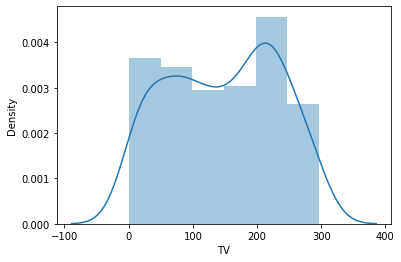

In [11]:
sns.distplot(df["TV"])

In [12]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

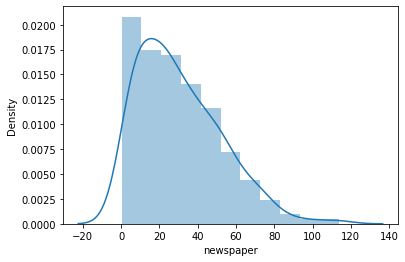

In [17]:
sns.distplot(df["newspaper"])

In [18]:
df['newspaper']=df["newspaper"].apply(np.log1p)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

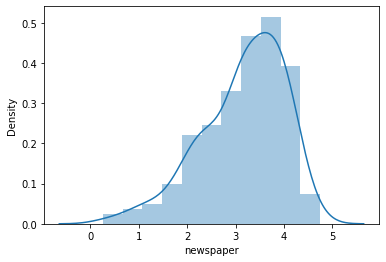

In [19]:
sns.distplot(df["newspaper"])

In [80]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,3.153164,14.022500
std,85.854236,14.846809,0.866508,5.217457
min,0.700000,0.000000,0.262364,1.600000
25%,74.375000,9.975000,2.621019,10.375000
50%,149.750000,22.900000,3.286519,12.900000
75%,218.825000,36.525000,3.830813,17.400000
max,296.400000,49.600000,4.744932,27.000000


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
df_num=df.drop("sales",axis=1)

In [82]:
df_num.head()

,TV,radio,newspaper
0,230.1,37.8,4.251348
1,44.5,39.3,3.830813
2,17.2,45.9,4.252772
3,151.5,41.3,4.085976
4,180.8,10.8,4.084294


In [27]:
df_num=df.drop("Unnamed: 0",axis=1)

In [83]:
df_num

,TV,radio,newspaper
0,230.1,37.8,4.251348
1,44.5,39.3,3.830813
2,17.2,45.9,4.252772
3,151.5,41.3,4.085976
4,180.8,10.8,4.084294
...,...,...,...
195,38.2,3.7,2.694627
196,94.2,4.9,2.208274
197,177.0,9.3,2.001480
198,283.6,42.0,4.207673


In [84]:
df_num=df.drop("sales",axis=1)

In [85]:
ms=MinMaxScaler()
df_num_sc=ms.fit_transform(df_num)

In [86]:
df_sc = pd.DataFrame(df_num_sc, index = df_num.index, columns=df_num.columns)

In [87]:
df_sc.head()

,TV,radio,newspaper
0,0.775786,0.762097,0.889888
1,0.148123,0.792339,0.796072
2,0.055800,0.925403,0.890206
3,0.509976,0.832661,0.852996
4,0.609063,0.217742,0.852621


In [88]:
X=df_sc
Y=df["sales"]

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state= 34)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [46]:
pred = lr.predict(X_test)

In [93]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [94]:
mse = mean_squared_error(y_test, pred)

In [95]:
mse

3.207611513759575

In [96]:
r2_score(y_test,pred)

0.891953319603784

In [51]:
mean_absolute_error(y_test,pred)

1.5314052145920083

In [52]:
pred1=lr.predict(X_train)

In [53]:
r2_score(y_train,pred1)

0.8970976864496489

In [54]:
from sklearn.linear_model import Lasso,Ridge

In [101]:
ls=Lasso()
ls.fit(X_train,y_train)

Lasso()

In [102]:
ls_pred=ls.predict(X_test)

In [103]:
r2_score(y_test,ls_pred)

0.12684805855904957

In [104]:
mean_absolute_error(y_test,ls_pred)

4.414441221055954

In [105]:
ls=Lasso(alpha=0.5)
ls.fit(X_train,y_train)

Lasso(alpha=0.5)

In [106]:
ls_pred=ls.predict(X_test)

In [107]:
r2_score(y_test,ls_pred)

0.7198166832012031

In [108]:
ls.coef_

array([7.73716285, 3.82647093, 0.        ])

In [109]:
rd=Ridge()
rd.fit(X_train,y_train)

Ridge()

In [110]:
re_pred=rd.predict(X_test)

r2_score(Y_test,re_pred)

In [111]:
r2_score(y_test,re_pred)

0.9034535989730598

In [112]:
rd.coef_

array([12.89007592,  8.90053634,  0.30576582])